## Анализ данных 

**Импорт библиотек:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yaml
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV

In [3]:
data = pd.read_csv('data/data.csv', index_col='id')

In [4]:
data.head()

,relation,personal_political,personal_religion_id,personal_people_main,personal_life_main,personal_smoking,personal_alcohol,universities_id,sex
id,,,,,,,,,
42460480,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4629.0,1
8882147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55348747,1.0,3.0,NaN,NaN,NaN,NaN,NaN,35837.0,1
26921686,2.0,NaN,102.0,NaN,NaN,NaN,NaN,364.0,1
38970318,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1


**Взглянем на описание признаков:**

In [10]:
descr = open('description/description_of_features.yaml', mode = 'r', encoding = 'utf-8')

description = yaml.load(descr, yaml.SafeLoader)

description

{'id': 'идентификатор пользователя, integer',
 'relation': {1: 'не женат/не замужем',
  2: 'есть друг/есть подруга',
  3: 'помолвлен/помолвлена',
  4: 'женат/замужем',
  5: 'всё сложно',
  6: 'в активном поиске',
  7: 'влюблён/влюблена',
  8: 'в гражданском браке',
  0: 'не указано'},
 'personal_political': {1: 'коммунистические',
  2: 'социалистические',
  3: 'умеренные',
  4: 'либеральные',
  5: 'консервативные',
  6: 'монархические',
  7: 'ультраконсервативные',
  8: 'индифферентные',
  9: 'либертарианские',
  0: 'другое'},
 'personal_religion_id': 'id мировоззрение, integer',
 'personal_inspired_by': 'источники вдохновения, string',
 'personal_people_main': {1: 'ум и креативность',
  2: 'доброта и честность',
  3: 'красота и здоровье',
  4: 'власть и богатство',
  5: 'смелость и упорство',
  6: 'юмор и жизнелюбие',
  0: 'другое'},
 'personal_life_main': {1: 'семья и дети',
  2: 'карьера и деньги',
  3: 'развлечения и отдых',
  4: 'наука и исследования',
  5: 'совершенствование мира

**Расшифровка `universities_id` и `personal_religion_id`:**

In [22]:
universities_df = pd.read_csv('description/descr_universities.csv', index_col='universities_id')
religion_df = pd.read_csv('description/descr_religion.csv', index_col='personal_religion_id')

In [23]:
universities_df.head()

,universities_name
universities_id,
1191703.0,ШИ (ф) ЮРГТУ (НПИ)
1191452.0,ВлГУ им. А.Г. и Н.Г. Столетовых (ВлГУ и ВГГУ)
1191289.0,ККИ РУК
1191252.0,УзГИФК
1191156.0,"НАПКС (бывш. КИПКС, СФ ДИСИ)"


In [24]:
religion_df.head()

,personal_religion
personal_religion_id,
201.0,Пастафарианство
200.0,Светский гуманизм
167.0,Иудаизм
139.0,Конфуцианство
129.0,Буддизм


**Категориальный признак `universities_id` встречается редко, поэтому было принято решение удалить его:**

In [92]:
data.groupby('universities_id')['sex'].count().sort_values(ascending = False)

universities_id
2.0         1692
1.0          840
477.0        304
56.0         275
1096.0       274
            ... 
225584.0       1
226203.0       1
226328.0       1
226572.0       1
98293.0        1
Name: sex, Length: 7523, dtype: int64

In [93]:
data = data.drop('universities_id', axis=1)

**Удаляем выбросы:**

In [94]:
data = data.drop(data[data['relation'] < 0].index)
data = data.drop(data[data['relation'] > 8].index)
data = data.drop(data[data['personal_political'] > 9].index)
data = data.drop(data[data['personal_religion_id'] == 1].index)

**Зависимость признаков от пола:**

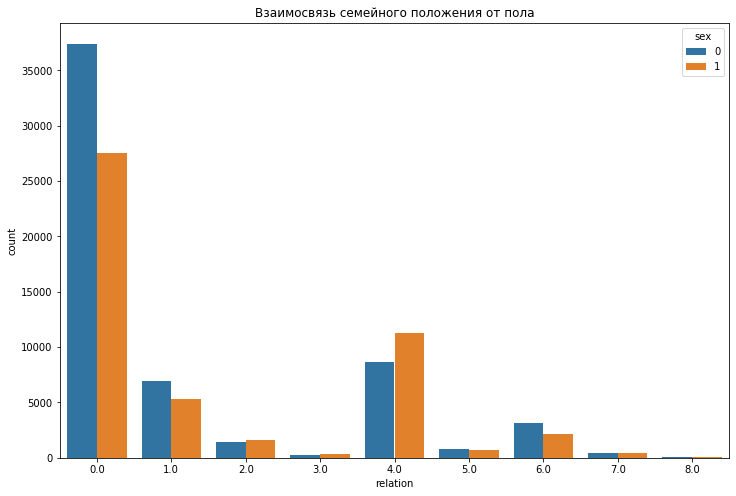

In [95]:
plt.figure(figsize=(12, 8))
sns.countplot(x='relation', hue='sex', data=data);
plt.title('Взаимосвязь семейного положения от пола');

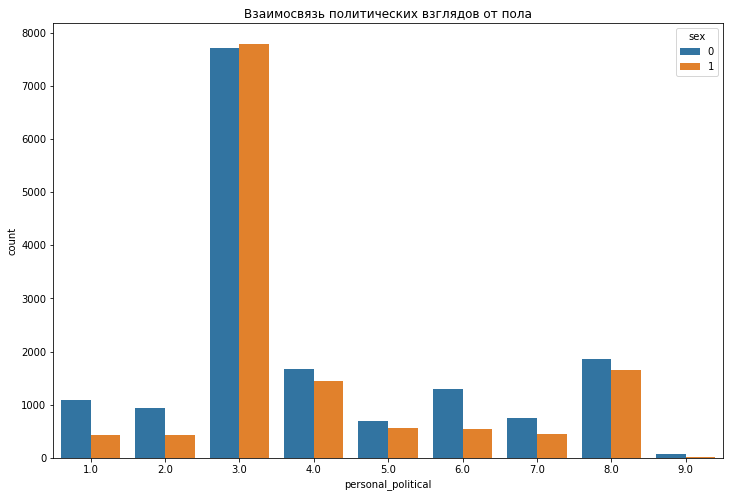

In [96]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_political', hue='sex', data=data);
plt.title('Взаимосвязь политических взглядов от пола');

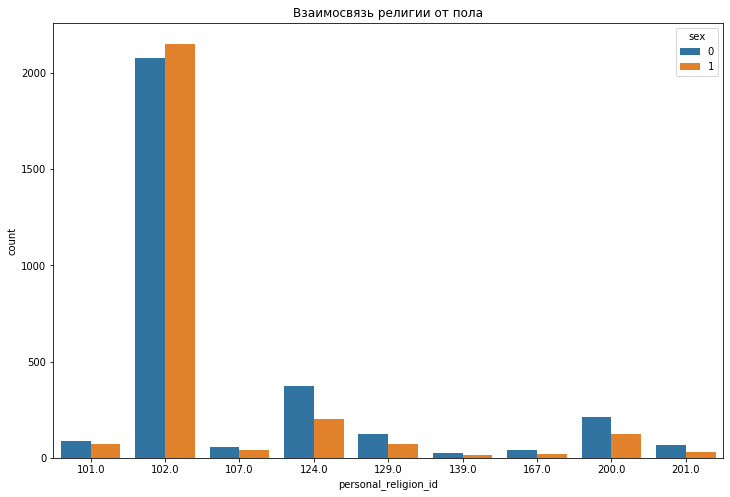

In [97]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_religion_id', hue='sex', data=data);
plt.title('Взаимосвязь религии от пола');

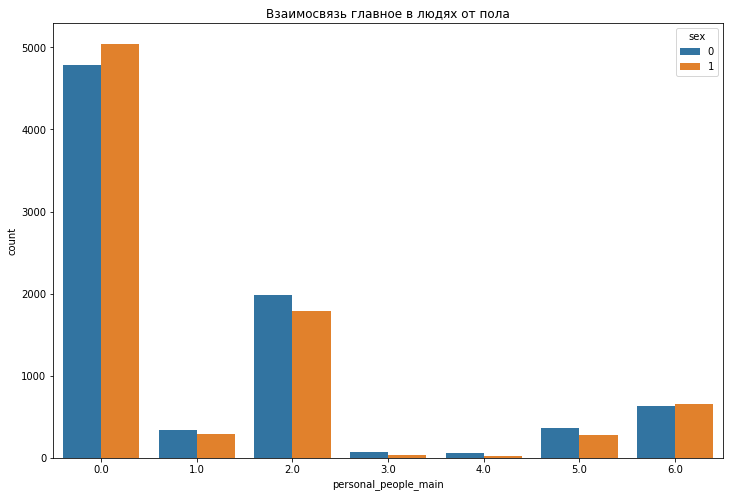

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_people_main', hue='sex', data=data);
plt.title('Взаимосвязь главное в людях от пола');

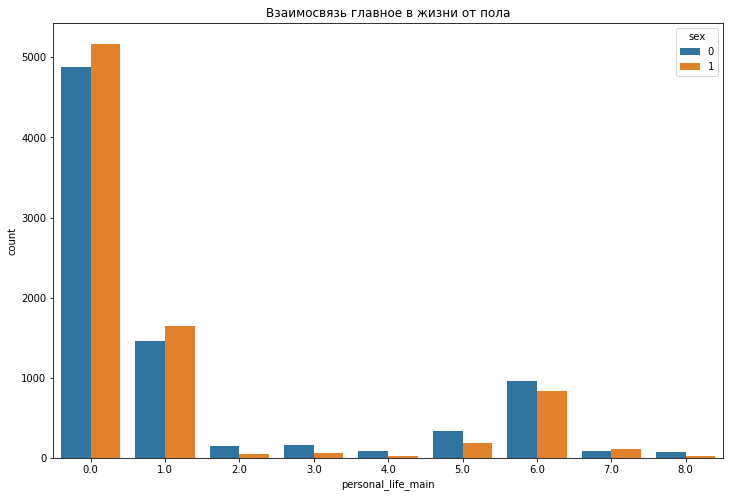

In [102]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_life_main', hue='sex', data=data);
plt.title('Взаимосвязь главное в жизни от пола');

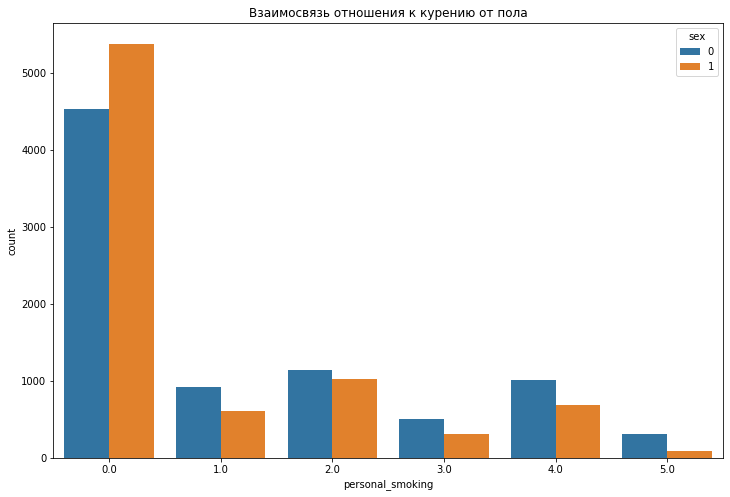

In [103]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_smoking', hue='sex', data=data);
plt.title('Взаимосвязь отношения к курению от пола');

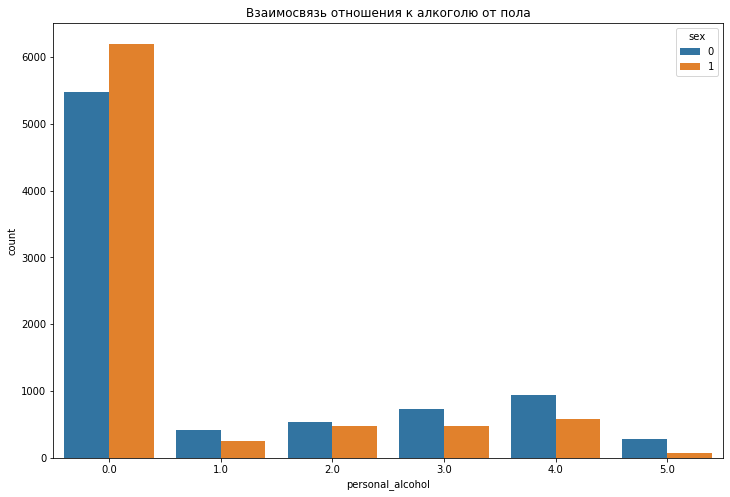

In [104]:
plt.figure(figsize = (12, 8))
sns.countplot(x='personal_alcohol', hue='sex', data=data);
plt.title('Взаимосвязь отношения к алкоголю от пола');

**Унитарное кодирование признаков - `One Hot Encoding`:**

In [15]:
data.head()

,relation,personal_political,personal_religion_id,personal_people_main,personal_life_main,personal_smoking,personal_alcohol,sex
id,,,,,,,,
42460480,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8882147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55348747,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
26921686,2.0,NaN,102.0,NaN,NaN,NaN,NaN,1
38970318,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1


In [16]:
data = pd.get_dummies(data, columns=['relation',
                      'personal_political',
                      'personal_religion_id', 
                      'personal_people_main', 
                      'personal_life_main',
                      'personal_smoking', 
                      'personal_alcohol'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220112 entries, 42460480 to 52653967
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   sex                         220112 non-null  int64
 1   relation_0.0                220112 non-null  uint8
 2   relation_1.0                220112 non-null  uint8
 3   relation_2.0                220112 non-null  uint8
 4   relation_3.0                220112 non-null  uint8
 5   relation_4.0                220112 non-null  uint8
 6   relation_5.0                220112 non-null  uint8
 7   relation_6.0                220112 non-null  uint8
 8   relation_7.0                220112 non-null  uint8
 9   relation_8.0                220112 non-null  uint8
 10  personal_political_1.0      220112 non-null  uint8
 11  personal_political_2.0      220112 non-null  uint8
 12  personal_political_3.0      220112 non-null  uint8
 13  personal_political_4.0      220112 

**Деление выборки на объекты - `X` и метки - `y`:**

In [18]:
X = data.drop('sex', axis=1)
y = data['sex']

**Разбиение выборки на `Train set` и `Test set`:**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

**Задаем модель:**

In [86]:
%%time

log_reg = LogisticRegression(C=0.092, random_state=17, n_jobs=-1)

log_reg.fit(X_train, y_train)

Wall time: 13.1 s


LogisticRegression(C=0.092, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=17,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

**Выбор наилучшего парамтера регуляризации:**

In [85]:
%%time

for C in np.linspace(0.08, 0.1, 20):
    
    log_reg = LogisticRegression(C=C, random_state=17, n_jobs=-1)

    log_reg.fit(X_train, y_train)
    
    print('Точность прогноза при С = {} состовляет: {:.6f}'.format(C, accuracy_score(log_reg.predict(X_test), y_test)))

Точность прогноза при С = 0.08 состовляет: 0.564558
Точность прогноза при С = 0.08105263157894738 состовляет: 0.564558
Точность прогноза при С = 0.08210526315789474 состовляет: 0.564558
Точность прогноза при С = 0.08315789473684211 состовляет: 0.564573
Точность прогноза при С = 0.08421052631578947 состовляет: 0.564558
Точность прогноза при С = 0.08526315789473685 состовляет: 0.564573
Точность прогноза при С = 0.0863157894736842 состовляет: 0.564573
Точность прогноза при С = 0.08736842105263158 состовляет: 0.564603
Точность прогноза при С = 0.08842105263157896 состовляет: 0.564588
Точность прогноза при С = 0.08947368421052632 состовляет: 0.564603
Точность прогноза при С = 0.09052631578947369 состовляет: 0.564603
Точность прогноза при С = 0.09157894736842105 состовляет: 0.564618
Точность прогноза при С = 0.09263157894736843 состовляет: 0.564603
Точность прогноза при С = 0.09368421052631579 состовляет: 0.564603
Точность прогноза при С = 0.09473684210526316 состовляет: 0.564603
Точность пр

**Функция, которая показывает важность признаков:**

In [23]:
def best_coef(coefs, features=X.columns):
    return pd.DataFrame(coefs, index=features, columns=['coef']).sort_values('coef', ascending=False)

In [24]:
best_coef(log_reg.coef_[0])

,coef
personal_life_main_7.0,0.574667
personal_life_main_1.0,0.397370
personal_people_main_6.0,0.387097
personal_life_main_6.0,0.307671
personal_people_main_1.0,0.274404
personal_religion_id_102.0,0.209412
personal_smoking_0.0,0.204698
personal_people_main_4.0,0.203277
relation_3.0,0.183694
personal_religion_id_101.0,0.158592
